In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from keras.layers import Dense, Input
from keras.models import Model

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:]
y = data[:, 1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [6]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [37]:
in_layer = Input(shape=[784])
dense_1 = Dense(200, activation="tanh")(in_layer)
dense_2 = Dense(50, activation="tanh")(dense_1)
out = Dense(10, activation="softmax")(dense_2)

In [38]:
model = Model(inputs=[in_layer], outputs=[out])

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [50]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 0s 85us/step - loss: 0.2043 - acc: 0.9414
Epoch 2/10
5360/5360 [==============================] - 0s 23us/step - loss: 0.1899 - acc: 0.9424
Epoch 3/10
5360/5360 [==============================] - 0s 27us/step - loss: 0.1823 - acc: 0.9472
Epoch 4/10
5360/5360 [==============================] - 0s 26us/step - loss: 0.1810 - acc: 0.9466
Epoch 5/10
5360/5360 [==============================] - 0s 22us/step - loss: 0.1805 - acc: 0.9459
Epoch 6/10
5360/5360 [==============================] - 0s 24us/step - loss: 0.1801 - acc: 0.9476
Epoch 7/10
5360/5360 [==============================] - 0s 24us/step - loss: 0.1720 - acc: 0.9459
Epoch 8/10
5360/5360 [==============================] - 0s 24us/step - loss: 0.1754 - acc: 0.9489
Epoch 9/10
5360/5360 [==============================] - 0s 22us/step - loss: 0.1788 - acc: 0.9500
Epoch 10/10
5360/5360 [==============================] - 0s 22us/step - loss: 0.1707 - acc: 0.9472


In [51]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 63us/step


[0.2837223130645174, 0.9102272727272728]

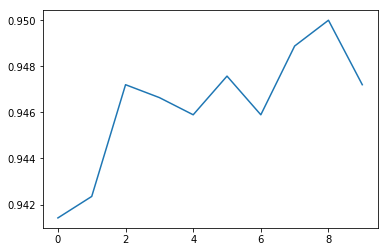

In [52]:
plt.plot(hist.history["acc"])

In [59]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [60]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [61]:
m2.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 118us/step


[0.2837223130645174, 0.9102272727272728]